# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combined = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
mouse_count = data_combined['Mouse ID'].count()

print(f"Number of mice: {mouse_count}")

Number of mice: 1893


In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mouse_count = data_combined['Mouse ID'].nunique()

print(f"Number of unqiue Mouse ID: {unique_mouse_count}")

# Checking for duplicates based on 'Mouse ID' and 'Timepoint'
duplicate_rows = data_combined[data_combined.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_count = duplicate_rows.shape[0]

print(f"Number of duplicate rows (same Mouse ID and Timepoint): {duplicate_count}")

# Display duplicates if any
if duplicate_count > 0:
    print("Duplicate entries based on 'Mouse ID' and 'Timepoint':")
    print(duplicate_rows)
else:
    print("No duplicate entries found for 'Mouse ID' and 'Timepoint'.")


Number of unqiue Mouse ID: 249
Number of duplicate rows (same Mouse ID and Timepoint): 10
Duplicate entries based on 'Mouse ID' and 'Timepoint':
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.0

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
if duplicate_count > 0:
    duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()
    all_data_duplicates = data_combined[data_combined['Mouse ID'].isin(duplicate_mouse_ids)]
    print("All data for duplicate Mouse ID(s):")
    print(all_data_duplicates)

All data for duplicate Mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  F

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_combined.drop_duplicates(subset=['Mouse ID'])

print(clean_data.head())

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
10     s185    Capomulin  Female           3          17          0   
20     x401    Capomulin  Female          16          15          0   
30     m601    Capomulin    Male          22          17          0   
40     g791     Ramicane    Male          11          16          0   

    Tumor Volume (mm3)  Metastatic Sites  
0                 45.0                 0  
10                45.0                 0  
20                45.0                 0  
30                45.0                 0  
40                45.0                 0  


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs in the clean DataFrame: {clean_mouse_count}")

Number of unique Mouse IDs in the clean DataFrame: 249


## Summary Statistics

In [18]:
# Group data by 'Drug Regimen'
grouped_data = data_combined.groupby('Drug Regimen')

# Calculate summary statistics
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the summary statistics into a DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Standard Deviation Tumor Volume': std_tumor_volume,
    'SEM Tumor Volume': sem_tumor_volume
})

# Display the summary statistics DataFrame
print(summary_statistics)



              Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Deviation Tumor Volume  SEM 

In [19]:
# Use the aggregation method to calculate the summary statistics in a single line
summary_statistics = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Display the summary statistics DataFrame
print(summary_statistics)


                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

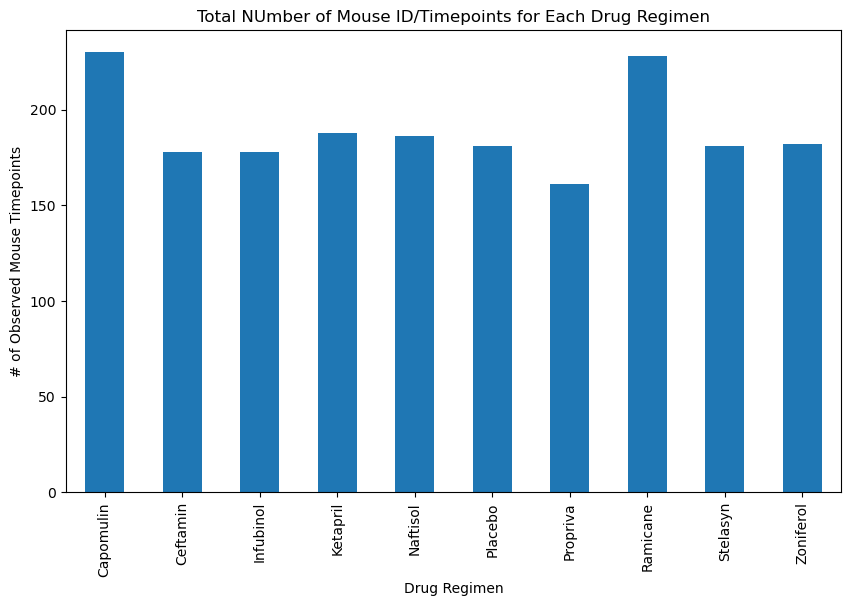

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = data_combined.groupby('Drug Regimen').size()

#Create the bar plot
drug_regimen.plot(kind='bar', figsize=(10, 6))

#Add title and labels
plt.title('Total NUmber of Mouse ID/Timepoints for Each Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

#Display the plot
plt.show()

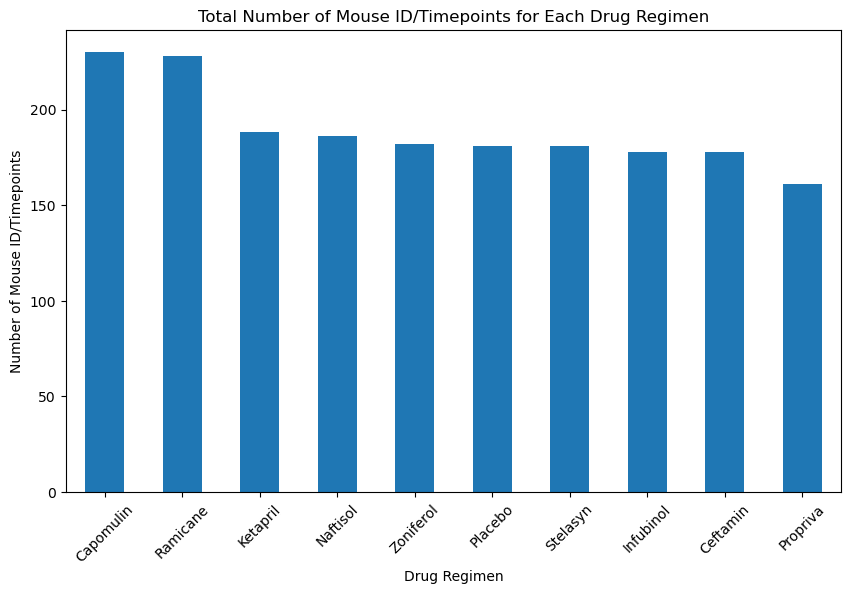

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = data_combined['Drug Regimen'].value_counts()

# Sort the counts in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)

# Create the bar plot using Pandas
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=45)

# Display the plot
plt.show()


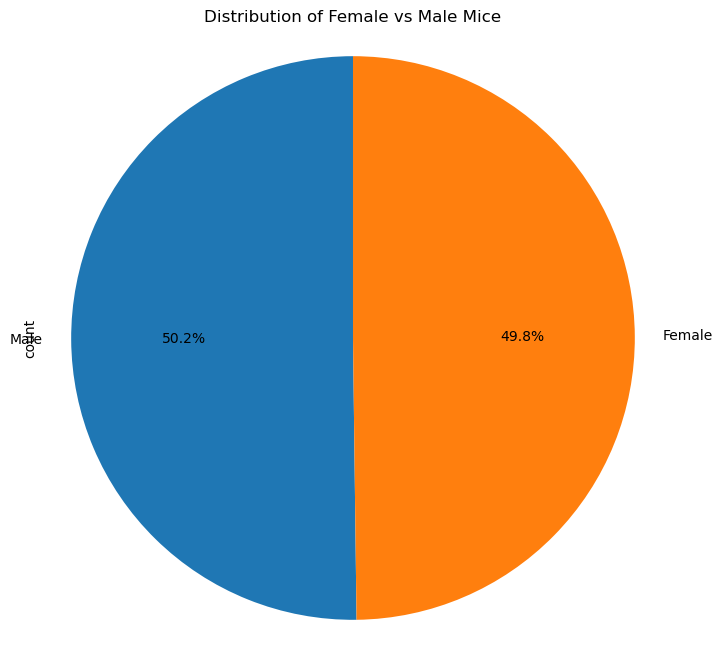

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
sex_counts = mouse_metadata['Sex'].value_counts()

# Create the pie plot using Pandas
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

# Add title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the plot
plt.show()


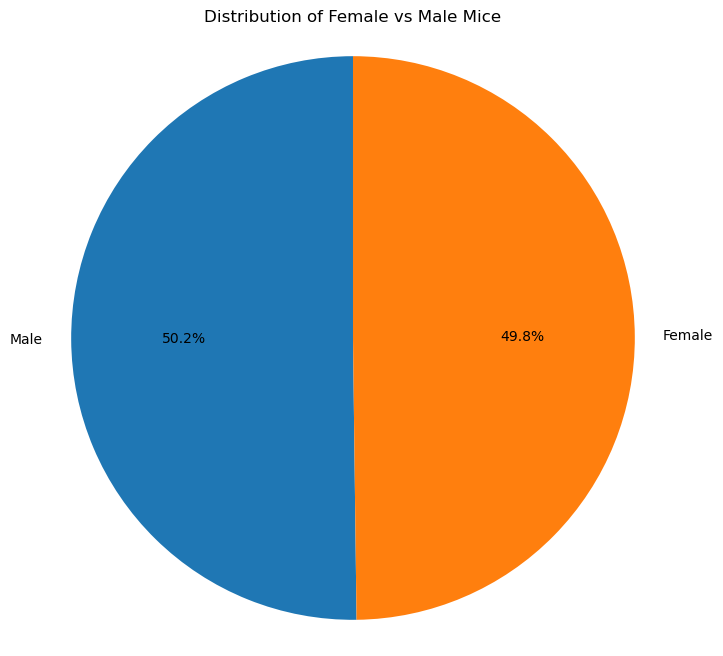

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
sex_counts = mouse_metadata['Sex'].value_counts()

# Create the pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Define the treatment regimens to consider
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the specified treatment regimens
filtered_data = data_combined[data_combined['Drug Regimen'].isin(treatments)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, data_combined, on=['Mouse ID', 'Timepoint'], how='left')

# Display the merged DataFrame
print(merged_data.head())



  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  


In [25]:
# Define the treatment regimens to consider
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Initialize an empty dictionary to store outliers
outliers_dict = {}

# Iterate over each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the lower and upper bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store the outliers in the dictionary
    outliers_dict[treatment] = outliers

    # Print the IQR and bounds for each treatment
    print(f"{treatment}:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Outliers: {outliers}\n")

# Display the tumor volume data for plotting
print(tumor_vol_data)

# Display the outliers dictionary
print(outliers_dict)



Capomulin:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane:
Lower quartile: 31.56046955
Upper quartile: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol:
Lower quartile: 54.04860769
Upper quartile: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.75326

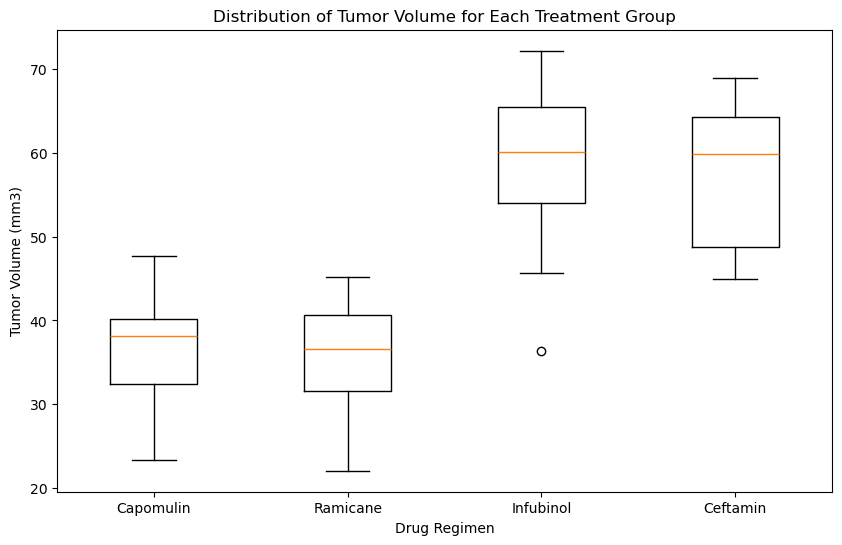

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Define the treatment regimens to consider
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a box plot for the tumor volume data of each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Add title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

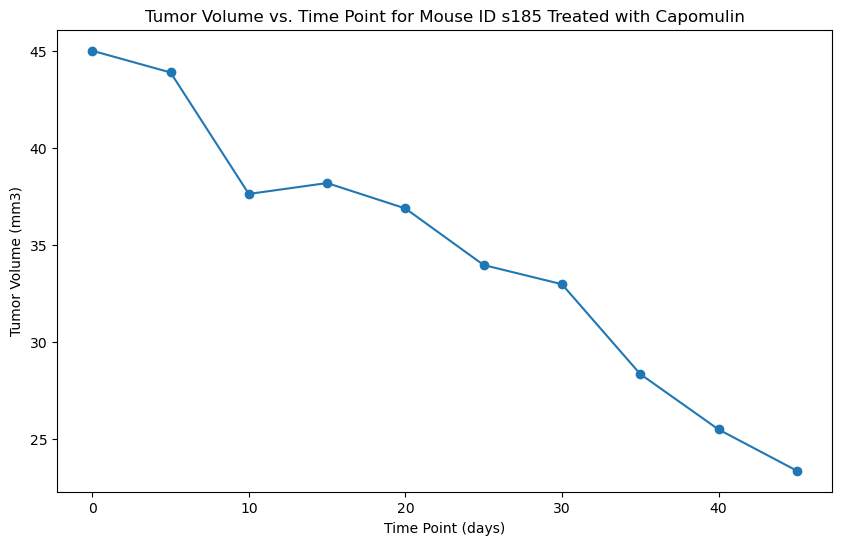

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
mouse_id = data_combined[(data_combined['Drug Regimen'] == 'Capomulin')]['Mouse ID'].iloc[0]

# Extract the time points and tumor volumes for that mouse
mouse_data = data_combined[(data_combined['Mouse ID'] == mouse_id)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


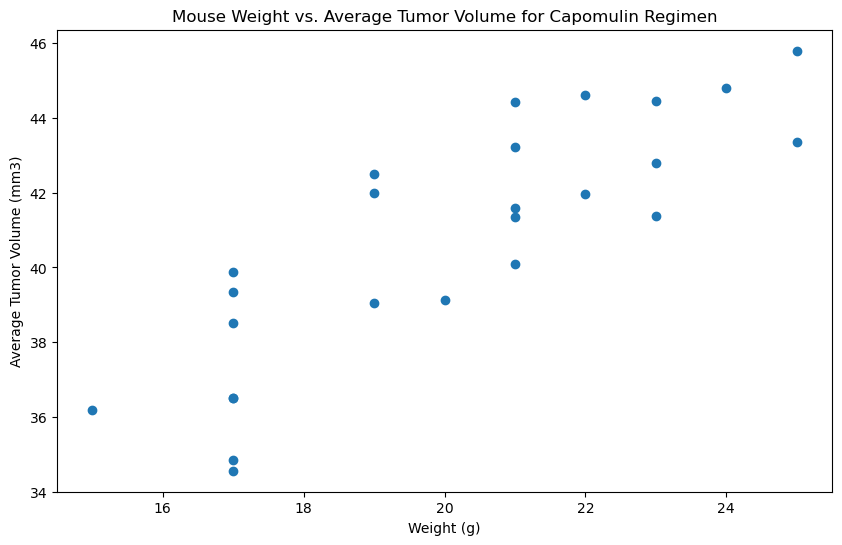

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_data = data_combined[data_combined['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with mouse metadata to get the weight of each mouse
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

Correlation coefficient: 0.8419363424694722
Linear regression slope: 0.9544396890241049
Linear regression intercept: 21.552160532685008
R-squared value: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


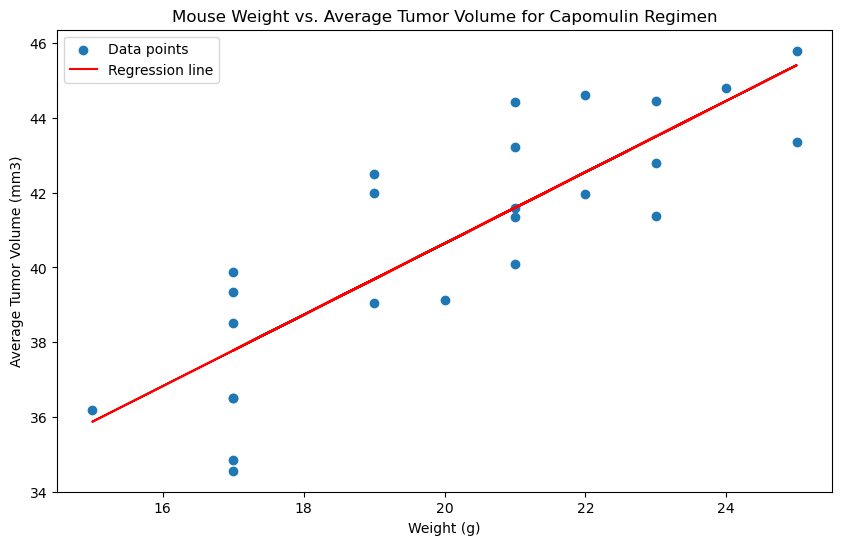

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Filter the data for mice treated with Capomulin
capomulin_data = data_combined[data_combined['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with mouse metadata to get the weight of each mouse
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Linear regression slope: {slope}")
print(f"Linear regression intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Create the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], label='Data points')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.show()
